# Data Mining Project - Naive Bayes

## Introduction
In this experiment, adult's income related data set has been analysed,and 'Naive Bayes' clssification method has been used for the analysis. Python libraries such as scikit-learn, graphviz, matplotlib has been used for the experiement to pre process data, train and test the model and visulazation.


## Naive Bayes clssification
It is another classification technique, where Baye's theorem is being used with the assumption that, all the feature attributes are independent on each other, which is also known as the 'Naive' property. In this

In [7]:
# Import all the required Python libraries.
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB

import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import itertools

In [8]:
# Load the 'Adult' data set from the csv file.
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 
             'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'label']

data_frame = pd.read_csv("adult.data", header=None, names=col_names)


In [9]:
data_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Fill any missing value, as it stated that there may be missing values in the data set.
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(data_frame)

array([[39, ' State-gov', 77516, ..., 40, ' United-States', ' <=50K'],
       [50, ' Self-emp-not-inc', 83311, ..., 13, ' United-States',
        ' <=50K'],
       [38, ' Private', 215646, ..., 40, ' United-States', ' <=50K'],
       ...,
       [58, ' Private', 151910, ..., 40, ' United-States', ' <=50K'],
       [22, ' Private', 201490, ..., 20, ' United-States', ' <=50K'],
       [52, ' Self-emp-inc', 287927, ..., 40, ' United-States', ' >50K']],
      dtype=object)

In [11]:
# Convert categorical data inot numerical data

enc = LabelEncoder()
enc.fit(data_frame['workclass'])
data_frame['workclass'] = enc.transform(data_frame['workclass'])

enc.fit(data_frame['education'])
data_frame['education'] = enc.transform(data_frame['education'])

enc.fit(data_frame['marital-status'])
data_frame['marital-status'] = enc.transform(data_frame['marital-status'])

enc.fit(data_frame['occupation'])
data_frame['occupation'] = enc.transform(data_frame['occupation'])

enc.fit(data_frame['relationship'])
data_frame['relationship'] = enc.transform(data_frame['relationship'])

enc.fit(data_frame['race'])
data_frame['race'] = enc.transform(data_frame['race'])

enc.fit(data_frame['sex'])
data_frame['sex'] = enc.transform(data_frame['sex'])

enc.fit(data_frame['hours-per-week'])
data_frame['hours-per-week'] = enc.transform(data_frame['hours-per-week'])

enc.fit(data_frame['native-country'])
data_frame['native-country'] = enc.transform(data_frame['native-country'])

enc.fit(data_frame['label'])
data_frame['label'] = enc.transform(data_frame['label'])

data_frame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7,77516,9,13,4,1,1,4,1,2174,0,39,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,12,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,39,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,39,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,39,5,0


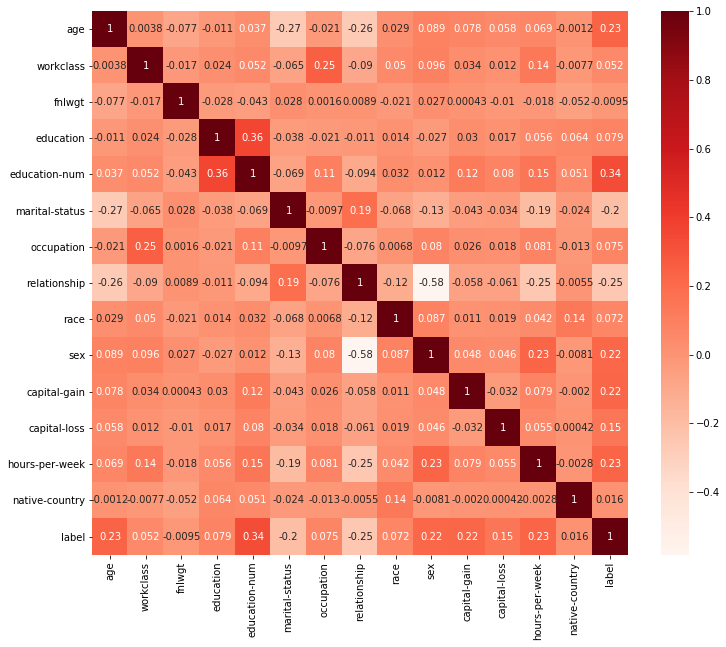

In [12]:
# Feature Selection

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data_frame.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
#Correlation with output variable
cor_target = abs(cor["label"])
cor_target

#Selecting highly correlated features
relevant_features = cor_target[cor_target > 0.18]
relevant_features

age               0.234037
education-num     0.335154
marital-status    0.199307
relationship      0.250918
sex               0.215980
capital-gain      0.223329
hours-per-week    0.232393
label             1.000000
Name: label, dtype: float64

In [14]:
# Seperate out feature attributes and target attribute.
feature_cols = ['age', 'education-num', 'marital-status', 'relationship', 'sex', 'capital-gain', 'hours-per-week']

X = data_frame[feature_cols]

# Get the target attribute.
y = data_frame.label

#Split the data set, in to train(70%) and test(30%) Holdout Method.
train, test, train_label, test_label = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
epochs = 10
total_acc = 0
total_error = 0
for i in range(epochs):    
    train, test, train_label, test_label = train_test_split(X, y, test_size=0.3)
    nb_classifire = GaussianNB()
    nb_model = nb_classifire.fit(train, train_label)
    nb_test_pred = nb_model.predict(test)
    nb_accuracy = accuracy_score(test_label, nb_test_pred);
    nb_mse = mean_squared_error(test_label, nb_test_pred);
    total_acc = total_acc + nb_accuracy
    total_error = total_error + nb_mse
    print(i, nb_accuracy, nb_mse)

    
avg_acc = total_acc /  epochs
avg_mse = total_error / epochs

print("AVG: ", avg_acc, avg_mse)

0 0.7961920360323472 0.20380796396765277
1 0.7956802129184154 0.2043197870815846
2 0.7998771624526564 0.20012283754734364
3 0.8010031733033064 0.19899682669669363
4 0.7943494728221927 0.20565052717780735
5 0.7966014945234927 0.2033985054765073
6 0.8003889855665882 0.1996110144334118
7 0.7963967652779199 0.20360323472208006
8 0.7962944006551336 0.2037055993448664
9 0.7958849421639881 0.2041150578360119
AVG:  0.7972668645716039 0.20273313542839594


In [16]:
# Create Naive Bayes classifer object.
nb_classifire = GaussianNB()

# Train Naive Bayes Classifer and get the model.
nb_model = nb_classifire.fit(train, train_label)

#Predict the response for test dataset
nb_test_pred = nb_model.predict(test)
nb_test_probs = nb_model.predict_proba(test)[:, 1]

nb_train_pred = nb_model.predict(train)
nb_train_probs = nb_model.predict_proba(train)[:, 1]

In [17]:
# Calculate Accurcy and Confusion Matrix for Naive Bayes method.
nb_accuracy = accuracy_score(test_label, nb_test_pred);
print("NB Accuracy:",nb_accuracy)

nb_confusion_matrix = confusion_matrix(test_label, nb_test_pred)
print("NB Confusion Matrix:")
print(nb_confusion_matrix)

NB Accuracy: 0.7958849421639881
NB Confusion Matrix:
[[7197  176]
 [1818  578]]


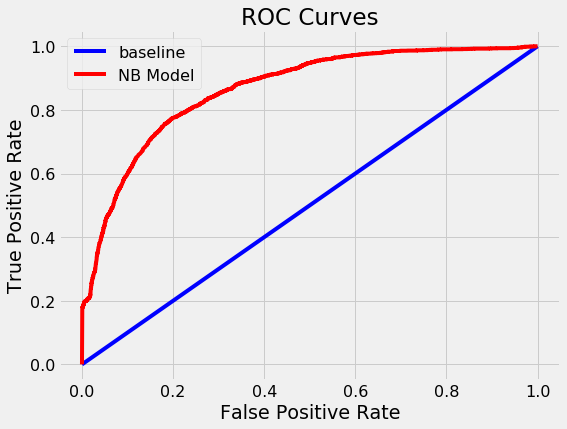

In [26]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18

# Calculate false positive rates and true positive rates
base_fpr, base_tpr, _ = roc_curve(test_label, [1 for _ in range(len(test_label))])
nb_model_fpr, nb_model_tpr, _ = roc_curve(test_label, nb_test_probs)

plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
    
# Plot both curves.
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.plot(nb_model_fpr, nb_model_tpr, 'r', label = 'NB Model')

plt.legend();
plt.xlabel('False Positive Rate'); 
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdPu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[7324  150]
 [1734  561]]


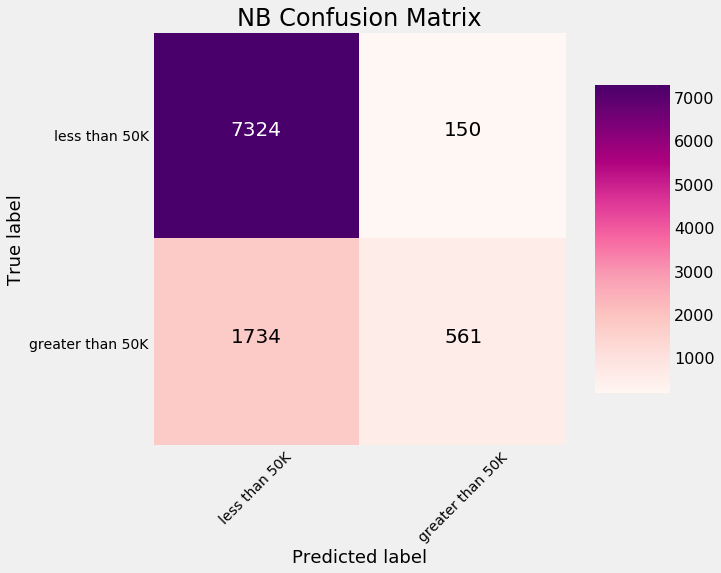

In [28]:
plot_confusion_matrix(nb_confusion_matrix, classes = ['less than 50K', 'greater than 50K'],
                      title = 'NB Confusion Matrix')